<a href="https://colab.research.google.com/github/griscz/beam-college/blob/main/day2/DoFn_lifecycle_%5Bblank%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DoFn lifecycle in Apache Beam

Let's explore how `DoFn`s work in Apache Beam, and what are the different steps that are followed when executing a `DoFn`.

## Install Apache Beam

In [ ]:
!pip install apache_beam[interactive]==2.28.0 --quiet

     |████████████████████████████████| 9.0MB 8.3MB/s 
     |████████████████████████████████| 153kB 40.7MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 2.2MB 54.5MB/s 
     |████████████████████████████████| 829kB 52.2MB/s 
     |████████████████████████████████| 17.7MB 221kB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 122kB 52.0MB/s 
     |████████████████████████████████| 788kB 27.1MB/s 
     |████████████████████████████████| 122kB 46.1MB/s 
     |████████████████████████████████| 112kB 48.8MB/s 
     |████████████████████████████████| 368kB 57.3MB/s 
ERROR: multiprocess 0.70.11.1 has requirement dill>=0.3.3, but you'll have dill 0.3.1.1 which is incompatible.
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.18 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5

## Some imports

In [ ]:
import apache_beam as beam
from apache_beam.runners.interactive.interactive_runner import InteractiveRunner
import apache_beam.runners.interactive.interactive_beam as ib

from datetime import datetime

# The friends of `ParDo``

For many situations, we will not need to create a fully featured `DoFn`, we can use some of the "friends" of `ParDo`.

For instance, let's take some numbers as input, and multiply each number by 10:
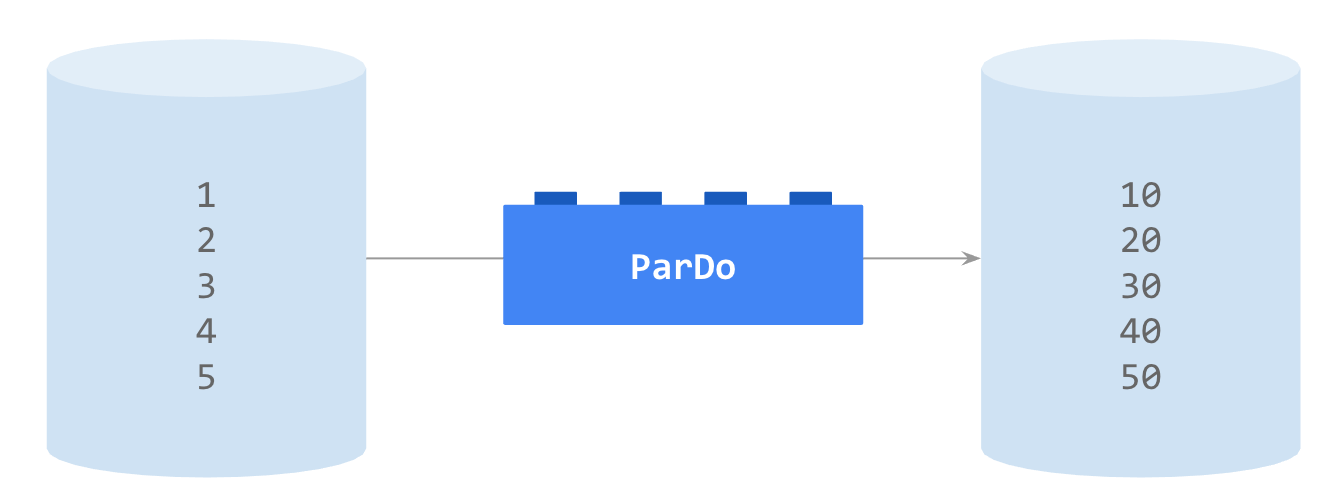

## Solution using a normal `DoFn`

We need to create our own class for a `DoFn` and override the process method:

In [ ]:
class MultiplyByTenDoFn(beam.DoFn):
  pass

In [ ]:
with beam.Pipeline(InteractiveRunner()) as p:
  pass


AttributeError: ignored

## Solution using `Map`

The same problem can be simply solved with a lambda. We don't need a fully featured `DoFn` just for this task:

In [ ]:
with beam.Pipeline(InteractiveRunner()) as p:
  input = p | beam.Create([1, 2, 3, 4, 5])
  ib.show(input)

  pass


# The lifecycle of `DoFn`

Now, in some situations we can benefit from controlling the lifecycle of our `DoFn`.

In this notebook, we are going to see just how this lifecycle works.

This will make much more sense when you learn about states and timers, in a later session at the Beam College.

## Input data for this pipeline

In [ ]:
p = beam.Pipeline(InteractiveRunner())

lines = ["En un lugar de la Mancha, de cuyo nombre no quiero acordarme,",
         "no ha mucho tiempo",
         "que vivía un hidalgo de los de lanza en astillero, adarga antigua,",
         "rocín flaco y galgo corredor."]

words = p | beam.Create(lines) \
          | beam.FlatMap(lambda x: x.split(" "))

ib.show(words)

## Is a `DoFn` the same as a map function?

We may think that executing a `DoFn` is just the same as running a `map`.

Let's see an example of a map application. Let's apply a function to sanitize the words in our `PCollection`.

This function is completely stateless. It accepts a word as input, and will return a new word. There is no initialization, shutdown of any kind of connection, aggregation, state, etc. It is just a stateless map: you can pass a reference to a function or a lambda. In the above cells, we showed how to use for instance a lambda with `FlatMap`.

In [ ]:
def sanitize_word(w):
  w = w.replace(".", "").replace(",", "").replace(";", "")
  w = w.lower()
  return w

In [ ]:
# TODO

## The methods of a `DoFn``

You may use a `DoFn` just for a map function. For that, overwrite the `process` method and you are good to go.

However, there are many more methods that you can override to control the lifecycle of a `DoFn`: creation of the worker, start of a new bundle, end of a new bundle, deletion of the worker, and of course, process of every element.

The `setup` and `teardown` methods will be executed only once per worker.

The `start_bundle` and `finish_bundle` will be executed once by data bundle

In [ ]:
class ChangeWordDoFn(beam.DoFn):
  pass

Our `DoFn` is printing some messages at different stages in the lifecycle. In this case, we have only a handful of data, so there is only a bundle. But if we had much more data, we would see more bundles,

In [ ]:
# TODO

Worker started 06/04/2021 20:52:00
Bundle started
Processing element: en
Processing element: un
Processing element: lugar
Processing element: de
Processing element: la
Processing element: mancha
Processing element: de
Processing element: cuyo
Processing element: nombre
Processing element: no
Processing element: quiero
Processing element: acordarme
Processing element: no
Processing element: ha
Processing element: mucho
Processing element: tiempo
Processing element: que
Processing element: vivía
Processing element: un
Processing element: hidalgo
Processing element: de
Processing element: los
Processing element: de
Processing element: lanza
Processing element: en
Processing element: astillero
Processing element: adarga
Processing element: antigua
Processing element: rocín
Processing element: flaco
Processing element: y
Processing element: galgo
Processing element: corredor
Bundle finished
Worker finished 06/04/2021 20:52:00
